In [1]:
import pandas as pd
import datetime as dt
import plotly.graph_objects as go
from plotting import CandlePlot

In [2]:
pair = "AUD_CAD"
granularity = "H1"
df = pd.read_pickle(f"../data/{pair}_{granularity}.pkl")
MA_LIST = [10,20,50,80,200]

In [3]:
df_ma = df[['time','mid_o', 'mid_h',
       'mid_l', 'mid_c']].copy()


In [4]:
for ma in MA_LIST:
    df_ma[f"MA_{ma}"]=df_ma.mid_c.rolling(window=ma).mean()
    df_ma.dropna(inplace=True)
    df_ma.reset_index(drop = True, inplace=True)
   



In [5]:
df_ma

,time,mid_o,mid_h,mid_l,mid_c,MA_10,MA_20,MA_50,MA_80,MA_200
0,2023-04-26 23:00:00+00:00,0.90073,0.90101,0.90065,0.90074,0.900126,0.900227,0.902544,0.903713,0.902495
1,2023-04-27 00:00:00+00:00,0.90076,0.90122,0.90023,0.90122,0.900230,0.900223,0.902431,0.903654,0.902518
2,2023-04-27 01:00:00+00:00,0.90118,0.90138,0.90055,0.90135,0.900379,0.900261,0.902312,0.903586,0.902544
3,2023-04-27 02:00:00+00:00,0.90132,0.90174,0.90068,0.90107,0.900532,0.900263,0.902213,0.903528,0.902570
4,2023-04-27 03:00:00+00:00,0.90106,0.90150,0.90082,0.90092,0.900662,0.900270,0.902119,0.903464,0.902593
...,...,...,...,...,...,...,...,...,...,...
3641,2023-11-24 17:00:00+00:00,0.89602,0.89708,0.89602,0.89682,0.897641,0.898270,0.897727,0.898122,0.894882
3642,2023-11-24 18:00:00+00:00,0.89684,0.89906,0.89650,0.89750,0.897509,0.898235,0.897728,0.898085,0.894964
3643,2023-11-24 19:00:00+00:00,0.89749,0.89783,0.89701,0.89768,0.897412,0.898196,0.897751,0.898047,0.895047
3644,2023-11-24 20:00:00+00:00,0.89768,0.89840,0.89738,0.89828,0.897323,0.898138,0.897790,0.897997,0.895133


In [6]:
traces = [f"MA_{x}" for x in MA_LIST]

In [7]:
traces


['MA_10', 'MA_20', 'MA_50', 'MA_80', 'MA_200']

In [8]:
cp = CandlePlot(df_ma.iloc[:50], candles = True)

In [10]:
cp = CandlePlot(df_ma.iloc[-50:], candles = True)

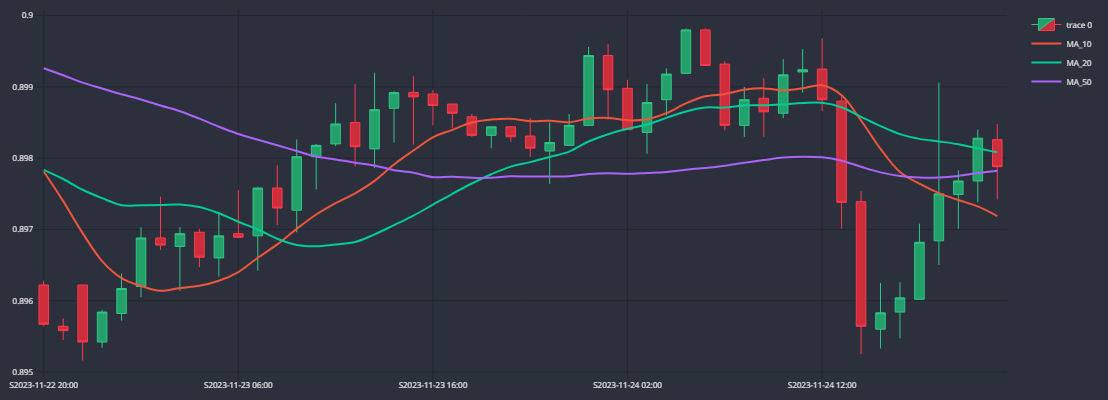

In [11]:
cp.show_plot(line_traces=["MA_10","MA_20","MA_50"])